# CYBERML - Project

#### Importation du dataset

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
# file1_path = "../SWaT.A7_June 2020/22June2020-_1_.csv"
# file2_path = "../SWaT.A7_June 2020/22June2020-_2_.csv"

# df1 = pd.read_csv(file1_path)
# df2 = pd.read_csv(file2_path)

In [3]:
# if list(df1.columns) != list(df2.columns):
#     print("Les colonnes des deux fichiers ne correspondent pas.")
#     print("Colonnes dans le fichier 1 :", df1.columns)
#     print("Colonnes dans le fichier 2 :", df2.columns)
# else:
#     print("Les colonnes des deux fichiers correspondent.")
#     df_combined = pd.concat([df1, df2], axis=0, ignore_index=True)

#     # Vérifier le nombre de lignes et de colonnes du dataset combiné
#     print(f"Dataset combiné : {df_combined.shape} lignes et colonnes")

#     # Sauvegarder le dataset combiné dans un fichier CSV
#     output_path = "../SWaT.A7_June 2020/22June2020_combined.csv"
#     df_combined.to_csv(output_path, index=False)

#     print(f"Dataset fusionné sauvegardé dans : {output_path}")

In [4]:
df = pd.read_csv("../SWaT.A7_June 2020/22June2020_combined.csv")

In [5]:
df.head()

,t_stamp,P1_STATE,LIT101.Pv,FIT101.Pv,MV101.Status,P101.Status,P102.Status,P2_STATE,FIT201.Pv,AIT201.Pv,...,FIT601.Pv,P601.Status,P602.Status,P603.Status,LSH601.Alarm,LSL601.Alarm,LSH602.Alarm,LSL602.Alarm,LSH603.Alarm,LSL603.Alarm
0,6/22/2020 10:00:00,3.0,695.284100,0.0,1.0,1.0,1.0,2.0,0.000256,18.072288,...,0.000256,1.0,1.0,1.0,Inactive,Inactive,Active,Inactive,Inactive,Active
1,6/22/2020 10:00:01,3.0,695.127100,0.0,1.0,1.0,1.0,2.0,0.000256,18.104332,...,0.000256,1.0,1.0,1.0,Inactive,Inactive,Active,Inactive,Inactive,Active
2,6/22/2020 10:00:02,3.0,694.930847,0.0,1.0,1.0,1.0,2.0,0.000256,18.104332,...,0.000256,1.0,1.0,1.0,Inactive,Inactive,Active,Inactive,Inactive,Active
3,6/22/2020 10:00:03,3.0,694.930847,0.0,1.0,1.0,1.0,2.0,0.000256,18.104332,...,0.000256,1.0,1.0,1.0,Inactive,Inactive,Active,Inactive,Inactive,Active
4,6/22/2020 10:00:04,3.0,694.852300,0.0,1.0,1.0,1.0,2.0,0.000256,18.104332,...,0.000256,1.0,1.0,1.0,Inactive,Inactive,Active,Inactive,Inactive,Active


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18002 entries, 0 to 18001
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   t_stamp        18000 non-null  object 
 1   P1_STATE       18000 non-null  float64
 2   LIT101.Pv      18000 non-null  float64
 3   FIT101.Pv      18000 non-null  float64
 4   MV101.Status   18000 non-null  float64
 5   P101.Status    18000 non-null  float64
 6   P102.Status    18000 non-null  float64
 7   P2_STATE       18000 non-null  float64
 8   FIT201.Pv      18000 non-null  float64
 9   AIT201.Pv      18000 non-null  float64
 10  AIT202.Pv      18000 non-null  float64
 11  AIT203.Pv      18000 non-null  float64
 12  MV201.Status   18000 non-null  float64
 13  P201.Status    18000 non-null  float64
 14  P202.Status    18000 non-null  float64
 15  P203.Status    18000 non-null  float64
 16  P204.Status    18000 non-null  float64
 17  P205.Status    18000 non-null  float64
 18  P206.S

In [7]:
df.describe()

,P1_STATE,LIT101.Pv,FIT101.Pv,MV101.Status,P101.Status,P102.Status,P2_STATE,FIT201.Pv,AIT201.Pv,AIT202.Pv,...,P502.Status,MV501.Status,MV502.Status,MV503.Status,MV504.Status,P6_STATE,FIT601.Pv,P601.Status,P602.Status,P603.Status
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.0,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.0,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.0
mean,2.182111,728.636533,0.196376,1.043667,1.393111,1.0,1.977722,0.923192,43.042094,8.168332,...,1.0,1.783667,1.778944,1.017111,1.022056,1.977722,0.009957,1.188556,1.005167,1.0
std,0.439775,87.223159,0.901751,0.208663,0.488455,0.0,0.147590,1.144597,33.331598,0.858849,...,0.0,0.415516,0.419364,0.152889,0.165374,0.147590,0.124982,0.391166,0.071696,0.0
min,1.000000,494.074463,0.000000,0.000000,1.000000,1.0,1.000000,0.000000,14.387337,7.133299,...,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.0
25%,2.000000,668.621675,0.000000,1.000000,1.000000,1.0,2.000000,0.000256,18.072288,7.492823,...,1.0,2.000000,2.000000,1.000000,1.000000,2.000000,0.000256,1.000000,1.000000,1.0
50%,2.000000,748.824900,0.000000,1.000000,1.000000,1.0,2.000000,0.000384,27.653166,7.641022,...,1.0,2.000000,2.000000,1.000000,1.000000,2.000000,0.000256,1.000000,1.000000,1.0
75%,2.000000,814.808800,0.000000,1.000000,2.000000,1.0,2.000000,2.343511,54.697514,8.858017,...,1.0,2.000000,2.000000,1.000000,1.000000,2.000000,0.000320,1.000000,1.000000,1.0
max,3.000000,816.967651,4.384588,2.000000,2.000000,1.0,2.000000,2.413097,110.356316,9.695784,...,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,1.805209,2.000000,2.000000,1.0


In [8]:
df.isnull().sum()

t_stamp         2
P1_STATE        2
LIT101.Pv       2
FIT101.Pv       2
MV101.Status    2
               ..
LSL601.Alarm    2
LSH602.Alarm    2
LSL602.Alarm    2
LSH603.Alarm    2
LSL603.Alarm    2
Length: 82, dtype: int64

In [17]:
pd.set_option('display.max_columns', None)

df.columns

Index(['P1_STATE', 'LIT101.Pv', 'FIT101.Pv', 'MV101.Status', 'P101.Status',
       'P102.Status', 'P2_STATE', 'FIT201.Pv', 'AIT201.Pv', 'AIT202.Pv',
       ...
       't_stamp_6/22/2020 9:59:53', 't_stamp_6/22/2020 9:59:54',
       't_stamp_6/22/2020 9:59:55', 't_stamp_6/22/2020 9:59:56',
       't_stamp_6/22/2020 9:59:57', 't_stamp_6/22/2020 9:59:58',
       't_stamp_6/22/2020 9:59:59', 'LSH601.Alarm_Inactive', 'Anomalie',
       'Anomalie_Label'],
      dtype='object', length=18068)

#### Pré-traitement des données

In [9]:
df = df.dropna()

df.isnull().sum()

t_stamp         0
P1_STATE        0
LIT101.Pv       0
FIT101.Pv       0
MV101.Status    0
               ..
LSL601.Alarm    0
LSH602.Alarm    0
LSL602.Alarm    0
LSH603.Alarm    0
LSL603.Alarm    0
Length: 82, dtype: int64

In [10]:
df = pd.get_dummies(df, drop_first=True)

In [11]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#### option 1 : Anomaly Detection

In [12]:
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(df_scaled)

anomalies = model.predict(df_scaled)

df['Anomalie'] = anomalies

In [ ]:
df['Anomalie_Label'] = df['Anomalie'].apply(lambda x: 'Normal' if x == 1 else 'Anomalie')

Anomalie_Label
Normal      17821
Anomalie      179
Name: count, dtype: int64

/tmp/ipykernel_80871/1006836175.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anomalie_Label', data=df, palette='coolwarm')


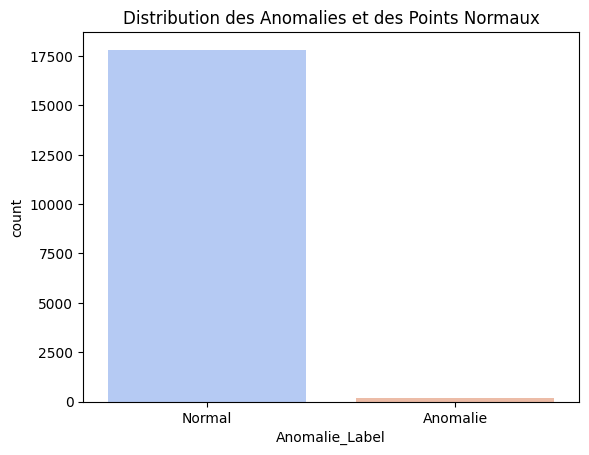

In [15]:
sns.countplot(x='Anomalie_Label', data=df, palette='coolwarm')
plt.title("Distribution des Anomalies et des Points Normaux")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Anomalie_Label', y='Feature1', data=df, palette='coolwarm')
plt.title("Valeurs de 'Feature1' par Type (Normales vs Anomalies)")
plt.show()

ValueError: Could not interpret value `Feature1` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [ ]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Anomalie_Label', palette='coolwarm', data=df)
plt.title("Projection 2D des Anomalies et Points Normaux")
plt.show()

#### option 2 : Adversarial attacks against classification

In [ ]:
X = df.drop(columns=['Target']) # définir la variable cible
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

KeyError: "['Target'] not found in axis"

In [ ]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))